Plot and summarize MultiNest samples using getdist over multiple datasets. Based on a script Wahid sent me.

In [1]:
# import anaconda3/personal python libraries
# TODO: maybe there's a cleaner way of doing this?
import sys
sys.path.append('/home/tmakinen/anaconda3/envs/bahamas/lib/python3.7/site-packages/')

In [4]:
import numpy as np
import pandas as pd
import getdist
import getdist.plots as pt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('./MNRAS_Style.mplstyle')

from chainconsumer import ChainConsumer

In [21]:
parameters = [
                #'probs', 
                'alpha', 'beta', 'rx', 
                'rc', 'sigma_res',
              'cstar', 'xstar', 'mstar',
           #   'gc', 'gx', 'gm', 'eps',
              'omegam', 'omegade', 'h', #, 
            'loglike'
            ]
reweight = [
                #'probs', 
                'alpha', 'beta', 'rx', 
                'rc', 'sigma_res',
              'cstar', 'xstar', 'mstar',
           #   'gc', 'gx', 'gm', 'eps',
              'omegam', 'omegade', 'h'] #, 
       #     'loglike'


param_plot_limits = {
    'alpha': (.1, .16), 'beta': (2.1, 2.8),
    'rx': (0.8, 1.2), 'rc':(.065, 0.105), 'sigma_res':(0.,0.12),
    'cstar': (-.035, 0.01), 'xstar':(-.5, 0.65), 'mstar':(-19.4, -19.25),
    'omegam': (-.1, 1), 'omegade': (0, 1.2), 'h': (.675, .725), 'w': (-4., 0), 
    'loglike': (-100, 0)
}

param_true_values = {
    'alpha': .13, 'beta': 2.56,
    'rx': 1, 'rc': 0.1, 'sigma_res': 0.1,
    'cstar': 0, 'xstar': 0.0, 'mstar': -19.3,
    'omegam': .3, 'omegade': .7, 'h': .72, 'w': -1.0,
    'loglike': -90
   # 'gc': -0.09669245704226216, 'gx': 0.038, 'gm': -0.5849406042825187, 'eps': 13.254733539684956
}

In [22]:
params_of_interest = ['alpha', 'beta', 
                      'rx', 
                        'rc', 
                      'sigma_res',
                      'cstar', 'xstar','mstar',
                    #  'gc', 'gx', 'gm', 'eps', 
                     'omegam', 'omegade'
                      
                      #, 'loglike'
                      
                     # 'h'
                        ]
                      
labels_of_interest = ['\\alpha', '\\beta', 
                       'r_x', 'r_c', 
                      '\\sigma_{res}',
                     'c_*', 'x_*', 'M_0',
                     # '\\gamma_c', '\\gamma_x', '\\gamma_m', '\\epsilon', 
                        '\\Omega_m', '\\Omega_{de}', 
                      #'w'
                      #'h', 'log(\\mathscr{L})'
                             ] # for plotting

weight_labels = ['unnormalized', 'easy', 'norm']

# load weighted mean samples

In [23]:
#job_id = '2287722' # bahamas multiple run
job_id = '470309'
n_sims = 10

In [24]:
data = []
norm_dat = []
weight_arr = []
loglikes = []
for i in range(n_sims):
    if i+1 not in [21]:
    #if i+1 not in [12]:
    #data_i = pd.read_csv('/rds/general/user/tmakinen/home/WORK/{}[{}].pbs/post_chains.csv'.format(job_id, i+1), sep=",", header=None)

        data_i = pd.read_csv('/c/Users/lucas/Datasets/posterior_samples/{}_lcdm/run_{}/gibbs_chains/post_chains.csv'.format(job_id, i+1), sep=",", header=None)
        data_i.columns = parameters
        loglikes.append(data_i['loglike'].values[8000:])
        data.append(data_i[params_of_interest][8000:])
    
    # take in normalized params for mean computation
        norm_i = pd.read_csv('/c/Users/lucas/Datasets/posterior_samples/{}_lcdm/run_{}/gibbs_chains/weighted_post.csv'.format(job_id, i+1), sep=",", header=None)
        norm_i.columns = reweight
        norm_dat.append(norm_i[params_of_interest])

    
    # compute weights
        weights = pd.read_csv('/c/Users/lucas/Datasets/posterior_samples/{}_lcdm/run_{}/gibbs_chains/weights.csv'.format(job_id, i+1), header=None)
        w_i = weights.T #.values[0]
        w_i.columns = weight_labels
        weight_arr.append(w_i[2000:]) 

In [25]:
print(1/(np.sum(weight_arr[0]['norm'])**2))

3.728518743343042


In [26]:
n_sims = len(data)
n_sims

10

In [27]:
param_sums = []
for j in range(len(norm_dat)):
    s_j = norm_dat[j].sum()
    param_sums.append(s_j)

tab = pd.concat(param_sums, axis=1)
tab.T.mean()

alpha         0.128180
beta          2.543784
rx            0.975743
rc            0.100977
sigma_res     0.095361
cstar        -0.006233
xstar         0.023210
mstar       -19.294638
omegam        0.301673
omegade       0.649552
dtype: float64

In [28]:
norm_dat;

# calculate summary statistics

In [29]:
true_values_of_interest = [param_true_values[label] for label in norm_dat[0].columns.values]
bias = [s_j.sum() - true_values_of_interest for s_j in norm_dat]
var = [data_i.var() for data_i in data]
mse = [var[i] + bias[i]**2 for i in range(n_sims)]

In [30]:
for i in range(n_sims):
    print('Simulation ', i)
    stats = pd.concat([bias[i].rename('bias'), var[i].rename('var'), mse[i].rename('mse')], axis=1)
    print(stats.T)

Simulation  0
         alpha      beta        rx        rc  sigma_res     cstar     xstar  \
bias  0.002133 -0.130227  0.014769 -0.000537   0.007340 -0.010428  0.007811   
var   0.000079  0.008096  0.001354  0.000013   0.000113  0.000023  0.002434   
mse   0.000083  0.025055  0.001572  0.000014   0.000166  0.000131  0.002495   

         mstar    omegam   omegade  
bias -0.015340 -0.058196 -0.090369  
var   0.000481  0.010430  0.031039  
mse   0.000716  0.013817  0.039205  
Simulation  1
         alpha      beta        rx        rc  sigma_res     cstar     xstar  \
bias  0.007234  0.024461 -0.044727  0.002396  -0.019674 -0.011414 -0.063152   
var   0.000084  0.006522  0.001163  0.000014   0.000142  0.000024  0.002062   
mse   0.000136  0.007120  0.003163  0.000020   0.000529  0.000155  0.006050   

         mstar    omegam   omegade  
bias  0.000884 -0.097160 -0.110337  
var   0.000375  0.009613  0.022231  
mse   0.000375  0.019053  0.034406  
Simulation  2
         alpha      beta    

In [31]:
# calculate summary bias and variance
# TODO: do these need to be reweighted?
# TODO: how meaningful are means of each statistic?
means = [s_j.mean() for s_j in norm_dat]
var_of_means = pd.concat(means, axis=1).T.var()
means = pd.concat(means, axis=1).T.mean()
#var_of_means = pd.concat(var_of_means, axis=1).T.mean()
#m_bias = pd.concat(bias, axis=1).mean()

#sigma_err = [m_bias / np.sqrt(np.mean(var) + mean_var[0]) for i in range(len(bias))]

#sigma_err = [bias[i] / np.sqrt(var[i]) for i in range(len(bias))]
mean_bias = pd.concat(bias, axis=1).T.mean()
var_of_bias = pd.concat(bias, axis=1).T.var()
sigma_err = (mean_bias / np.sqrt(var_of_bias + var_of_means))

In [32]:
mean_bias = pd.concat(bias, axis=1).T.mean().to_frame('mean bias')
var_of_bias = pd.concat(bias, axis=1).T.var().to_frame('var of bias')
mean_var = pd.concat(var, axis=1).T.mean().to_frame('mean var')
#mean_sigma_err = pd.concat([sigma_err], axis=1).T.to_frame('sigma err')
mean_sigma_err = sigma_err.to_frame('sigma err')
mean_mse = pd.concat(mse, axis=1).T.mean().to_frame('mean mse')

In [33]:
summarystats = pd.concat([mean_bias, var_of_bias, mean_sigma_err, mean_var, mean_mse], axis=1)
print(summarystats)
#summarystats.to_csv('~/jobs/gibbs_selection/plots{}.csv'.format(job_id))

           mean bias  var of bias  sigma err  mean var  mean mse
alpha      -0.001820     0.000050  -0.257067  0.000089  0.000137
beta       -0.016216     0.003289  -0.282760  0.007578  0.010801
rx         -0.024257     0.001445  -0.638194  0.001219  0.003108
rc          0.000977     0.000003   0.534986  0.000013  0.000017
sigma_res  -0.004639     0.000084  -0.506309  0.000125  0.000222
cstar      -0.006233     0.000020  -1.384306  0.000023  0.000081
xstar       0.023210     0.001679   0.566519  0.002175  0.004225
mstar       0.005362     0.000176   0.404060  0.000374  0.000562
omegam      0.001673     0.004821   0.024093  0.008793  0.013135
omegade    -0.050448     0.008866  -0.535770  0.023312  0.033837


# create posterior corner plot

In [34]:
# with weights
mcsamples = [getdist.mcsamples.MCSamples(samples=data[i].values, 
                               names=params_of_interest, 
                               labels=labels_of_interest, weights=weight_arr[i]['norm'].values*10000) for i in range(len(data))]

        
mcsamples.append(getdist.MCSamples(samples=pd.concat(data).values, 
                                   names=params_of_interest, 
                                   labels=labels_of_interest, weights=pd.concat(weight_arr)['norm'].values*10000))

aggregate = getdist.mcsamples.MCSamples(samples=pd.concat(data).values, 
                                   names=params_of_interest, 
                                   labels=labels_of_interest, weights=pd.concat(weight_arr)['norm'].values*10000)
cosmo_params = ['omegam', 'omegade']
cosmo_labs = ['\\Omega_m', '\\Omega_{\Lambda}']
cosmo_dat = pd.concat(data)[cosmo_params].values
cosmo = getdist.mcsamples.MCSamples(samples=cosmo_dat, 
                                   names=cosmo_params, 
                                   labels=cosmo_labs, weights=pd.concat(weight_arr)['norm'].values*10000)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [35]:
# plot settings
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

contour_args = []
line_args = []
legend_labels = []

for i in range(n_sims):
    contour_args.append({'color': colors[i]})
    line_args.append({'lw': .75, 'ls': '-', 'color': colors[i]})
    legend_labels.append('sample {}'.format(i+1))

#for i in range(1):
    #contour_args.append({'color': colors[i]})
    #line_args.append({'lw': .75, 'ls': '-', 'color': colors[i]})
    #legend_labels.append('sample 1 vanilla'.format(i+1))

# add in reweighted sample
#contour_args.append({'color': '#ff7f0e'})
#line_args.append({'lw': 2, 'ls': '-', 'color': '#ff7f0e'})
#legend_labels.append('sample 1 re-weighted')

# combined sample
contour_args.append({'color': '#000000'})
line_args.append({'lw': 2, 'ls': '-', 'color': '#000000'})
legend_labels.append('combined')

KeyboardInterrupt: 

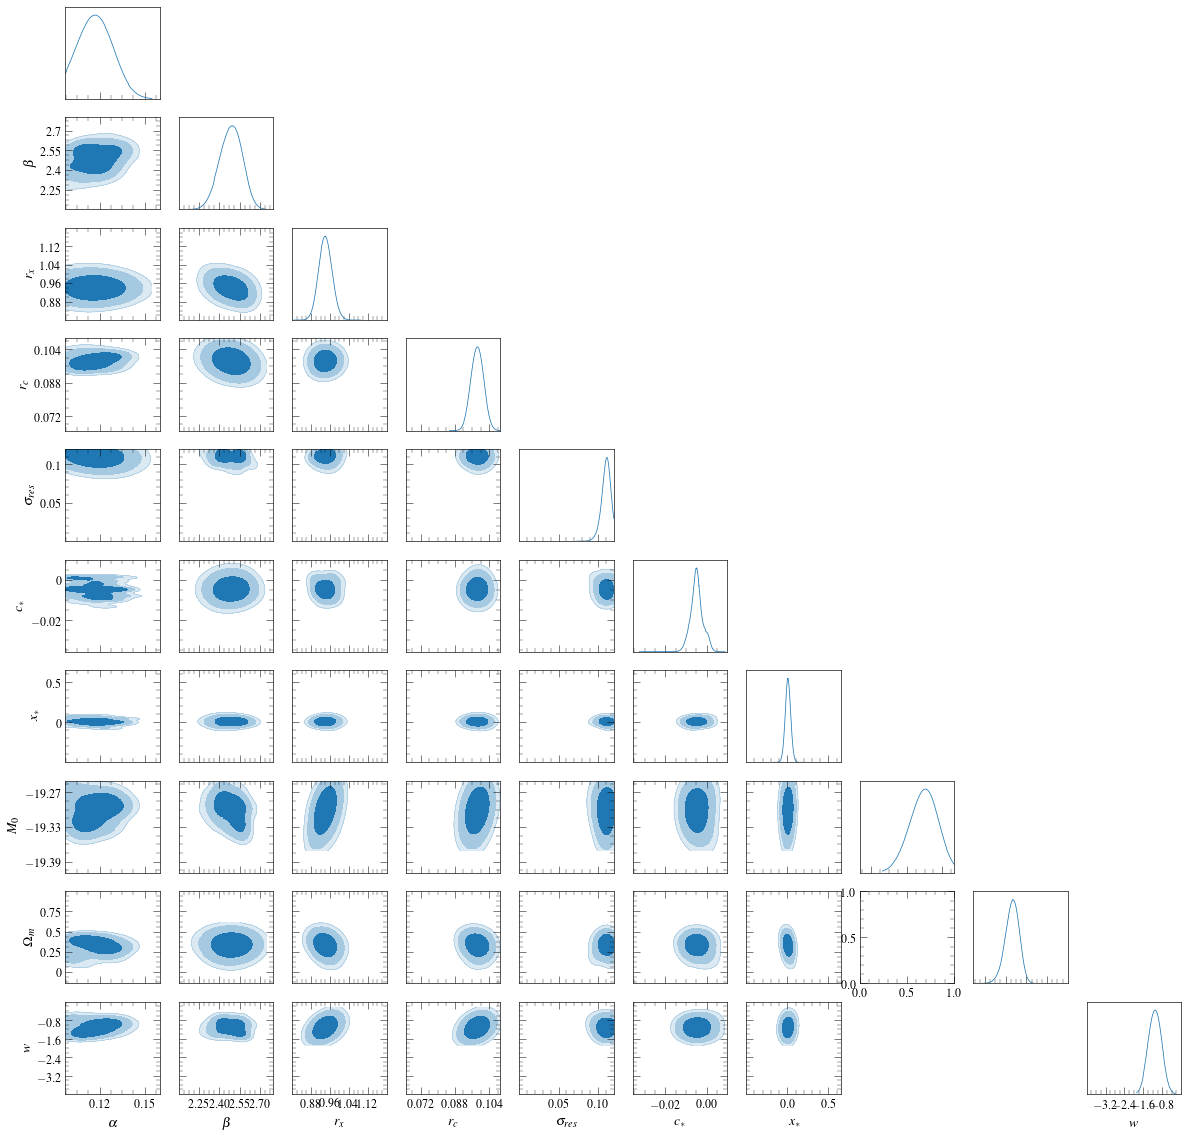

In [58]:
plotter = pt.getSubplotPlotter()
plotter.settings.num_plot_contours = 3
plotter.settings.rcSizes(12, 14, 12)

for mc in range(len(mcsamples)):
    try:
        plotter.triangle_plot(mcsamples[mc], filled=True, 
                      legend_labels=legend_labels, legend_ncol=2,
                      contour_args=contour_args[mc], line_args=line_args,
                      param_limits=param_plot_limits)
    except np.linalg.LinAlgError:
        pass

# draw true value lines
for i in range(len(plotter.subplots)):
    for j in range(len(plotter.subplots[i])):
        subplot = plotter.subplots[i][j]
        if subplot is not None:
            if i > j: # only draw horizontal line for 2D plots
                subplot.axhline(param_true_values[params_of_interest[i]], color='gray')
            subplot.axvline(param_true_values[params_of_interest[j]], color='gray')
#plt.savefig('/rds/general/user/tmakinen/home/jobs/plots/reweighted_arr_{}.png'.format(job_id), dpi='figure')
plt.show()


0.0 [1.34852919] 6.07027756796035 4


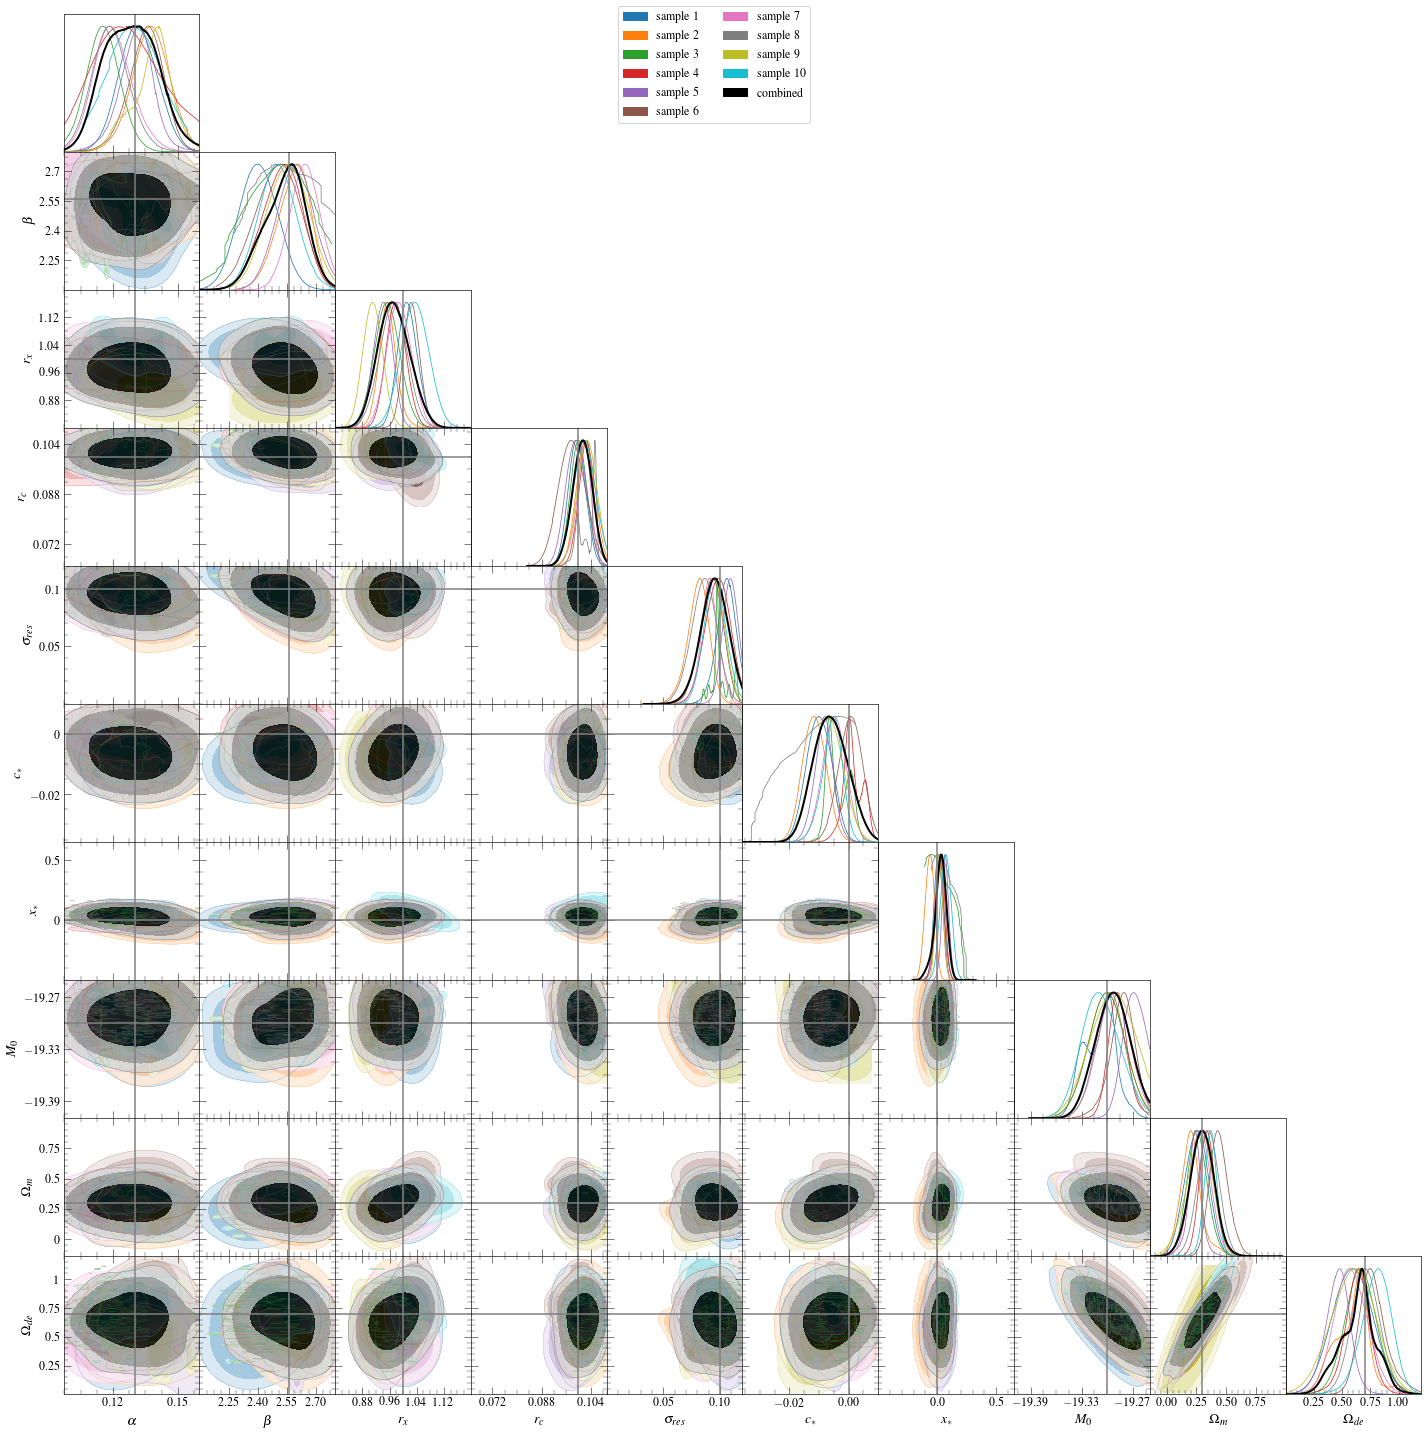

In [38]:
plt.style.use('./MNRAS_Style.mplstyle')
plotter = pt.getSubplotPlotter()
plotter.settings.num_plot_contours = 3
plotter.settings.rcSizes(12, 14, 12)

try:
    plotter.triangle_plot(mcsamples, filled=True, 
                      legend_labels=legend_labels, legend_ncol=2,
                      contour_args=contour_args, line_args=line_args,
                      param_limits=param_plot_limits)
except np.linalg.LinAlgError:
        pass

# draw true value lines
for i in range(len(plotter.subplots)):
    for j in range(len(plotter.subplots[i])):
        subplot = plotter.subplots[i][j]
        if subplot is not None:
            if i > j: # only draw horizontal line for 2D plots
                subplot.axhline(param_true_values[params_of_interest[i]], color='gray')
            subplot.axvline(param_true_values[params_of_interest[j]], color='gray')
plt.savefig('/c/Users/lucas/Documents/Imperial/writeup/plots/lcdm/reweighted_lcdm_arr_{}.pdf'.format(job_id), dpi='figure')
plt.show()


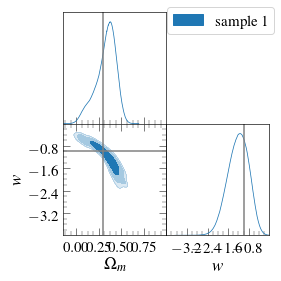

In [129]:
cosmo_params = ['omegam', 'w']
plt.style.use('./MNRAS_Style.mplstyle')
plotter = pt.getSubplotPlotter()
plotter.settings.num_plot_contours = 3
plotter.settings.rcSizes(15, 17, 15)

try:
    plotter.triangle_plot(cosmo, filled=True, 
                      legend_labels=legend_labels, legend_ncol=2,
                      contour_args=contour_args, line_args=line_args,
                      param_limits=param_plot_limits)
except np.linalg.LinAlgError:
        pass

# draw true value lines
for i in range(len(plotter.subplots)):
    for j in range(len(plotter.subplots[i])):
        subplot = plotter.subplots[i][j]
        if subplot is not None:
            if i > j: # only draw horizontal line for 2D plots
                subplot.axhline(param_true_values[cosmo_params[i]], color='gray')
            subplot.axvline(param_true_values[cosmo_params[j]], color='gray')
#plt.savefig('/rds/general/user/tmakinen/home/jobs/plots/reweighted_wcdm_arr_{}.png'.format(job_id), dpi='figure')
plt.show()


In [39]:
OmM = pd.concat(data)['omegam'].values
OmL = pd.concat(data)['omegade'].values
weight = pd.concat(weight_arr)['easy'].values

In [40]:
singleomegam = data[3]['omegam'].values
singleomegal = data[3]['omegade'].values
singleweight = weight_arr[3]['easy'].values

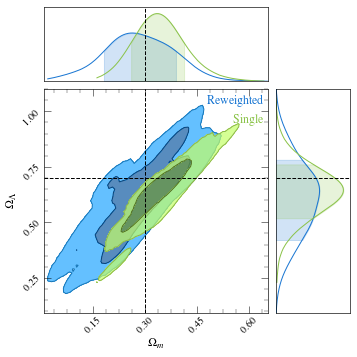

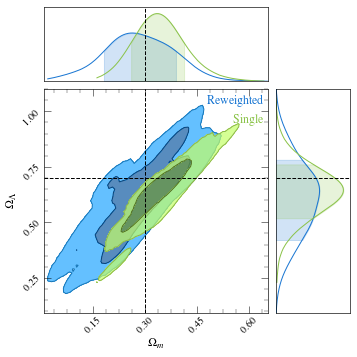

In [42]:
display_dat = [pd.concat(data)['omegam'].values, pd.concat(data)['omegade'].values]
single = [singleomegam, singleomegal]
c = ChainConsumer()
mean = [0.3, 0.7]
#c.add_chain(display_dat, parameters=["$\Omega_m$", "$w$"], name=r'Na\"ive')
c.add_chain(display_dat, parameters=["$\Omega_m$", "$\Omega_{\Lambda}$"], weights=weight, name='Reweighted')
c.add_chain(single, parameters=["$\Omega_m$", "$\Omega_{\Lambda}$"], weights=singleweight, name='Single')
c.configure(kde=[2.0, 2.0], flip=True)
#fig = c.plotter.plot(extents=[(-2, 4), (0, 9)])
c.plotter.plot(filename='/c/Users/lucas/Documents/Imperial/writeup/plots/lcdm/reweighted_single_cosmo_lcdm.pdf', figsize="column", truth=mean)

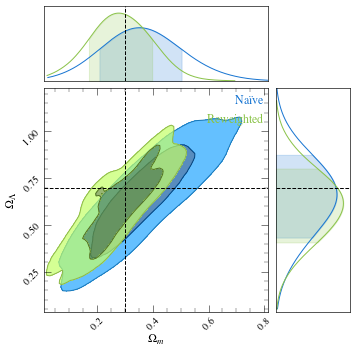

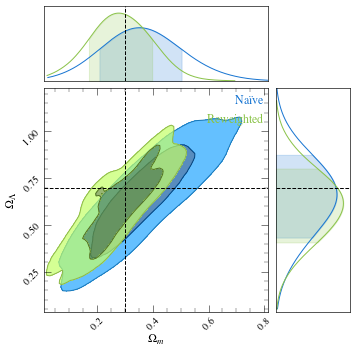

In [43]:
display_dat = [pd.concat(data)['omegam'].values, pd.concat(data)['omegade'].values]
c = ChainConsumer()
mean = [0.3, 0.7]
c.add_chain(display_dat, parameters=["$\Omega_m$", "$\Omega_{\Lambda}$"], name=r'Na\"ive')
c.add_chain(display_dat, parameters=["$\Omega_m$", "$\Omega_{\Lambda}$"], weights=weight, name='Reweighted')
c.configure(kde=[3.0, 3.0], flip=True)
#fig = c.plotter.plot(extents=[(-2, 4), (0, 9)])
c.plotter.plot(filename='/c/Users/lucas/Documents/Imperial/writeup/plots/lcdm/reweighted_comp_cosmo_lcdm.pdf', figsize="column", truth=mean)

# effective sample size metric

In [36]:
import effective_sample_size as sample_size

ess_pars = ['alpha', 'beta', 'omegam', 'omegade']


for param in ess_pars:
    for i in range(len(data)):
        ess = []
        param_vec = data[i][param].values
        ess.append((sample_size.effectiveSampleSize(param_vec)))
    ess = np.mean(ess)
    print('averaged ESS for {}: '.format(param) + '{0:8.3f}'.format(ess))

averaged ESS for alpha:   59.634
averaged ESS for beta:   15.836
averaged ESS for omegam:   92.870
averaged ESS for omegade:   68.324


# importance sampling to remove bias

In [37]:
import cosmology, latent_plots

In [39]:
job_id = 470309

In [40]:
n_sims

10

In [9]:
# aggregate the latent vectors together
diagnostic = []
for i in range(10):
    #if i+1 in [1,2,6]:
    #data_i = pd.read_csv('/rds/general/user/tmakinen/home/WORK/{}[{}].pbs/post_chains.csv'.format(job_id, i+1), sep=",", header=None)
    diag_i = pd.read_csv('/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/gibbs_chains/D_latent.csv'.format(job_id, i+1), sep=",", header=None)
    diagnostic.append(diag_i[8000::])

In [10]:
datafnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/sel_lcparams.txt'.format(job_id, i+1) for i in range(n_sims)]
dumpfnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/lc_params.txt'.format(job_id, i+1) for i in range(n_sims)]

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


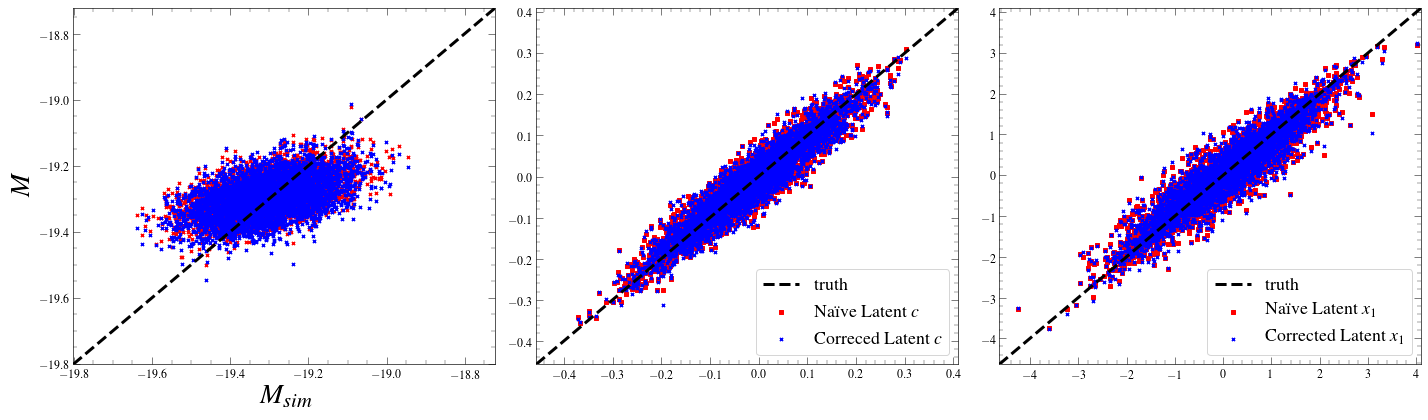

In [12]:
import cosmology
plt.style.use('./MNRAS_Style.mplstyle')

M_true = []

mb_true = []
c_true = []
x1_true = []
z = []

m_means = []
c_means = []
x_means = []
    
m_means_reweighted = []
c_means_reweighted = []
x_means_reweighted = []

# make 1 x 3 diagnostic scatter plot for M, c, x1
fig,(ax0,ax1,ax2) = plt.subplots(1, 3, figsize = (20,6))
#plt.suptitle('Posterior Representation for 10 Selection Effects Inferences', fontsize=32)
for i in range(len(diagnostic)):

    D_chain = diagnostic[i]
    datafname = datafnames[i]
    #print(len(D_chain))
    
    columns = D_chain.columns
    
    w_i = weight_arr[i]['norm'].values
        

    for j in range(len(columns)):
        if j % 3 == 0:
            m_means.append(np.mean(D_chain[columns[j+2]]))
            c_means.append(np.mean(D_chain[columns[j]]))
            x_means.append(np.mean(D_chain[columns[j+1]]))
            
            #w_i = weight_arr[i]['easy'].values
            
            m_means_reweighted.append(np.average(D_chain[columns[j+2]], weights=w_i))
            c_means_reweighted.append(np.average(D_chain[columns[j]], weights=w_i))
            x_means_reweighted.append(np.average(D_chain[columns[j+1]], weights=w_i))

    # compare to JLA-like sims -- take only every 10th snia
    data = pd.read_csv(datafname, sep='\s+', header=0)

    ndat = len(data)
    Zhel = data['z'].values
    zHD = data['z'].values
    # add second z column so that we have a zHD value
    data.insert(loc=1, column='zHD', value=zHD)
    Zcmb = data['z'].values
    
    z.append(data['z'].values)

    # unpack data values
    mb_true.append(data['true_mb'].values)
    c_true.append(data['true_c'].values)
    x1_true.append(data['true_x1'].values)

    # compute true residual
    a_true = 0.13
    b_true = 2.56
    cosmo_param = [0.3, 0.7, 0.72]              # true simulated params
    mu = cosmology.muz(cosmo_param, Zcmb, Zhel) # distance modulus

    M = []

    for i in range(ndat):
        M.append(data['true_mb'].values[i] - mu[i] + a_true*data['true_x1'].values[i] - b_true*data['true_c'].values[i])
    
    M_true.append(M)



    

    #ax0.legend(fontsize = 22, loc='upper left')
    # observed c vs simulated c
    #ax1.scatter(c_true, data['c'].values,  
                    #color = 'b', marker = 'x', s=10)
    
    # latent c vs simulated c
    #ax1.scatter(c_true, c_means,  color = 'r', 
                    #marker = 'x', s=10)
    
    # corrected latent c vs sim c
    #ax1.scatter(c_true, c_means_reweighted,  color = 'b', 
                    #marker = 'x', s=10)

    #ax1.set_ylabel('$c$', fontsize=28)
    #ax1.set_xlabel('$c_{sim}$', fontsize=28)
    #if i == n_sims-1:

    # latent x1
    #ax2.scatter(x1_true, data['x1'].values, 
                    #color = 'b', marker = 'x', s=10)
    #ax2.scatter(x1_true, x_means,  
                    #color = 'r', marker = 'x', s=10)
    
    # corrected x1
    #ax2.scatter(x1_true, x_means_reweighted,  
                    #color = 'b', marker = 'x', s=10)


    #ax2.set_ylabel('$x_1$', fontsize=28)
    #ax2.set_xlabel('$x_{1,sim}$', fontsize=28)
    
    
# plot last ones again for label's sake:
x = np.linspace(start=min(m_means)-0.3, stop = max(m_means)+0.3, num=50)
y = np.linspace(start=min(m_means)-0.3, stop = max(m_means)+0.3, num=50)
ax0.plot(x,y, linestyle='--', color='k', label='truth', linewidth=3)
ax0.set_ylabel('$M$', fontsize=28)
ax0.set_xlabel('$M_{sim}$', fontsize=28)

# plot M vs M_true
ax0.scatter(np.array(M_true), np.array(m_means), 
                            color='r', marker = 'x', s=10)
# plot M reweighted vs M_true
ax0.scatter(np.array(M_true), np.array(m_means_reweighted), 
                            color='b', marker = 'x', s=10)

# ax1
#ax1.scatter(c_true, data['c'].values, 
                    #color = 'b', marker = 's', s=10, label='Observed $\hat{c}$')
# latent c vs simulated c
ax1.scatter(c_true, c_means,  color = 'r', 
                    marker = 's', s=10, label=r'Na\"ive Latent $c$')
# corrected latent c vs sim c
ax1.scatter(c_true, c_means_reweighted,  color = 'b', 
                    marker = 'x', s=10, label='Correced Latent $c$')

x = np.linspace(start=min(c_means)-0.1, stop=max(c_means)+0.1, num=50)
y = np.linspace(start=min(c_means)-0.1, stop=max(c_means)+0.1, num=50)
ax1.plot(x,y, linestyle='--', color='k', label='truth', linewidth=3)  # plot truth line
ax1.legend(fontsize = 18, loc='lower right')

# ax2
#ax2.scatter(x1_true, data['x1'].values,  
                    #color = 'b', marker = 's', s=10, label='Observed $\hat{x}_1$')
ax2.scatter(x1_true, x_means,  
                    color = 'r', marker = 's', s=10, label=r'Na\"ive Latent $x_1$')

ax2.scatter(x1_true, x_means_reweighted,  
                    color = 'b', marker = 'x', s=10, label='Corrected Latent $x_1$')

x = np.linspace(start=min(x_means)-0.9, stop=max(x_means)+0.9, num=50)
y = np.linspace(start=min(x_means)-0.9, stop=max(x_means)+0.9, num=50)
ax2.plot(x,y, linestyle='--', color='k', label='truth', linewidth=3)  # plot truth line
ax2.legend(fontsize = 18, loc='lower right')
plt.tight_layout()
#plt.savefig(fname='/rds/general/user/tmakinen/home/jobs/plots/{}_van_on_sel_aggregate_posterior_diagnostic1.png'.format(job_id),rasterized=True, dpi='figure')
plt.show()



In [13]:
val = np.array(m_means) - x

ValueError: operands could not be broadcast together with shapes (5000,) (50,) 

(array([ 11.,  20.,  45., 102., 134., 100.,  63.,  22.,   1.,   2.]),
 array([-0.33069293, -0.26022496, -0.189757  , -0.11928903, -0.04882107,
         0.0216469 ,  0.09211486,  0.16258282,  0.23305079,  0.30351875,
         0.37398672]),
 <a list of 10 Patch objects>)

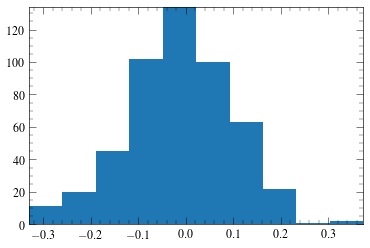

In [14]:
plt.hist(data['c'])

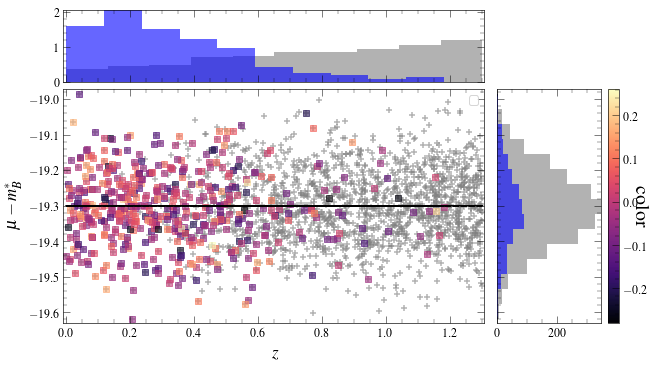

In [71]:
nullfmt = plt.NullFormatter()         # no labels
# plot msim - m by redshift
datafnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/sel_lcparams.txt'.format(job_id, i+1) for i in range(n_sims)]
latentfnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/lc_params.txt'.format(job_id, i+1) for i in range(n_sims)]
    
datafname = datafnames[4]
latentname = latentfnames[4]

dats = [latentname, datafname]

D_chain = diagnostic[4]
colours = ['gray', 'b']

columns = D_chain.columns
    
w_i = weight_arr[4]['norm'].values

mb_true = []
c_true = []
x1_true = []
z = []

m_means = []
c_means = []
x_means = []
    
m_means_reweighted = []
c_means_reweighted = []
x_means_reweighted = []
        

for j in range(len(columns)):
    if j % 3 == 0:
        m_means.append(np.mean(D_chain[columns[j+2]]))
        c_means.append(np.mean(D_chain[columns[j]]))
        x_means.append(np.mean(D_chain[columns[j+1]]))
        
        m_means_reweighted.append(np.average(D_chain[columns[j+2]], weights=w_i))
        c_means_reweighted.append(np.average(D_chain[columns[j]], weights=w_i))
        x_means_reweighted.append(np.average(D_chain[columns[j+1]], weights=w_i))

    # make histogram scatter plot
   
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

 # start with a rectangular Figure
plt.figure(3, figsize=(9, 5))


        #axHistx = plt.axes(rect_histx)

axHistx = plt.axes(rect_histx)
axScatter = plt.axes(rect_scatter)
axHisty = plt.axes(rect_histy)
# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

for i in range(len(dats)):

    data = pd.read_csv(dats[i], sep='\s+', header=0)

    ndat = len(data)
    Zhel = data['z'].values
    zHD = data['z'].values
    # add second z column so that we have a zHD value
    data.insert(loc=1, column='zHD', value=zHD)
    Zcmb = data['z'].values
    
    z = (data['z'].values)

    # unpack data values
    mb_true = (data['true_mb'].values)
    c_true = (data['true_c'].values)
    x1_true = (data['true_x1'].values)

    # unpack measured vals
    c_meas = data['c'].values
    x1_meas = data['x1'].values
    mb_meas = data['mb'].values
    
    # compute true residual
    a_true = 0.13
    b_true = 2.56
    cosmo_param = [0.3, 0.7, 0.72]              # true simulated params
    mu = cosmology.muz(cosmo_param, Zcmb, Zhel) # distance modulus

    M_true = []

    for j in range(ndat):
        M_true.append(data['true_mb'].values[j] - mu[j] + a_true*data['true_x1'].values[j] - b_true*data['true_c'].values[j])
        
        
        


        # the scatter plot:
        
    residual = M_true #np.array(mb_meas) - np.array(mb_true) #np.array(M_true)
    
    cbar = c_true
    
    if i+1 == 2:
        sctrac = axScatter.scatter(z, residual, c=cbar, cmap=plt.cm.magma, marker='s', alpha=0.6)
        colorbar = plt.colorbar(sctrac)
        colorbar.ax.set_alpha(1.0)
        colorbar.solids.set_edgecolor("face")
        colorbar.solids.set_rasterized(True) 

        colorbar.set_label('color', rotation=270, fontsize=20)
    else:
        axScatter.scatter(z, residual, c=colours[i], marker='+', alpha=0.6)
    
    axScatter.plot(z, np.ones(len(z))*-19.3, linestyle='--', color='k')
    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    
    #axScatter.set_xlim((-lim, lim))
    #axScatter.set_ylim((-lim, lim))

    #axScatter.set_xlim((17, 25))
    #axScatter.set_ylim((-2, 3))

    bins = np.arange(-lim, lim + binwidth, binwidth)

    axHistx.hist(z, color=colours[i], normed=True,  alpha=0.6)
    axHisty.hist(residual, bins=15, color=colours[i], alpha=0.6, normed=False, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    #axHistx.set_ylabel('Count', fontsize=10)
    #axHisty.set_xlabel('Count', fontsize=10)

    #if i == 1:
        #axScatter.bar(z, residual, width=0.005, color='b')
    



axScatter.set_xlabel(r'$z$', fontsize = 17)
axScatter.set_ylabel(r'$\mu - {m}^*_B$', fontsize=17)
axScatter.legend(loc='best')
    

Text(0, 0.5, '$\\mu(z) - \\mu_{sim} - M_0$')

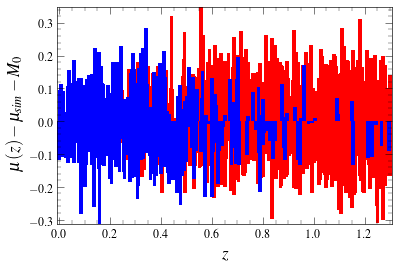

In [73]:
nullfmt = plt.NullFormatter()         # no labels
# plot msim - m by redshift
datafnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/sel_lcparams.txt'.format(job_id, i+1) for i in range(n_sims)]
latentfnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/lc_params.txt'.format(job_id, i+1) for i in range(n_sims)]
    
datafname = datafnames[6]
latentname = latentfnames[6]

dats = [latentname, datafname]

D_chain = diagnostic[6]
colours = ['r', 'b']

columns = D_chain.columns
    
w_i = weight_arr[4]['norm'].values

mb_true = []
c_true = []
x1_true = []
z = []

m_means = []
c_means = []
x_means = []
    
m_means_reweighted = []
c_means_reweighted = []
x_means_reweighted = []
        

for j in range(len(columns)):
    if j % 3 == 0:
        m_means.append(np.mean(D_chain[columns[j+2]]))
        c_means.append(np.mean(D_chain[columns[j]]))
        x_means.append(np.mean(D_chain[columns[j+1]]))
        
        m_means_reweighted.append(np.average(D_chain[columns[j+2]], weights=w_i))
        c_means_reweighted.append(np.average(D_chain[columns[j]], weights=w_i))
        x_means_reweighted.append(np.average(D_chain[columns[j+1]], weights=w_i))


fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(dats)):

    data = pd.read_csv(dats[i], sep='\s+', header=0)

    ndat = len(data)
    Zhel = data['z'].values
    zHD = data['z'].values
    # add second z column so that we have a zHD value
    data.insert(loc=1, column='zHD', value=zHD)
    Zcmb = data['z'].values
    
    z = (data['z'].values)

    # unpack data values
    mb_true = (data['true_mb'].values)
    c_true = (data['true_c'].values)
    x1_true = (data['true_x1'].values)

    # unpack measured vals
    c_meas = data['c'].values
    x1_meas = data['x1'].values
    mb_meas = data['mb'].values
    
    # compute true residual
    a_true = 0.13
    b_true = 2.56
    cosmo_param = [0.3, 0.7, 0.72]              # true simulated params
    mu = cosmology.muz(cosmo_param, Zcmb, Zhel) # distance modulus

    M_true = []

    for j in range(ndat):
        M_true.append(data['true_mb'].values[j] - mu[j] + a_true*data['true_x1'].values[j] - b_true*data['true_c'].values[j])
        
        
        


        # the scatter plot:
        
    residual = np.array(M_true) #np.array(mb_meas) - np.array(mb_true) #np.array(M_true)


    r = np.array(residual) + 19.3

    ax.bar(z, r, width=0.015, color=colours[i])

    #axHistx.set_ylabel('Count', fontsize=10)
    #axHisty.set_xlabel('Count', fontsize=10)


    
    
    

ax.set_xlabel(r'$z$', fontsize = 17)
ax.set_ylabel(r'$\mu(z) - \mu_{sim} - M_0$', fontsize=17)

    

In [74]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

<BarContainer object of 500 artists>

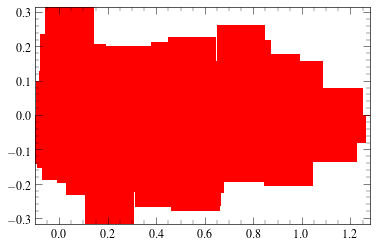

In [126]:

#You don't need to add a twin axis, you can plot both bar charts on the same axis like this:

r = np.array(residual) + 19.3
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(z, r, width=0.2, color='r')
#ax.bar(z, positive_data, width=1, color='b')

(array([  4.,  14.,  47.,  70., 131., 113.,  72.,  32.,  15.,   2.]),
 array([-19.61825902, -19.55491805, -19.49157707, -19.4282361 ,
        -19.36489512, -19.30155415, -19.23821318, -19.1748722 ,
        -19.11153123, -19.04819026, -18.98484928]),
 <a list of 10 Patch objects>)

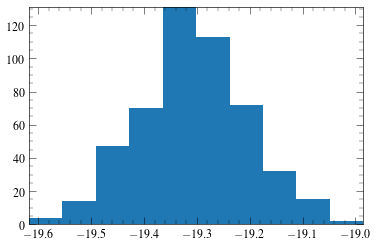

In [101]:
plt.hist(residual)

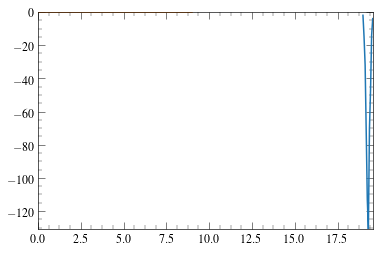

In [108]:
#bins = np.arange(min(z), max(z) + binwidth, binwidth)
hist, binsHist = np.histogram(residual, bins=sorted(-bins))
plt.plot(-binsHist[1:], -hist, np.diff(binsHist))

In [ ]:
nullfmt = plt.NullFormatter()         # no labels

        # definitions for the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left + width + 0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]

        # start with a rectangular Figure
        plt.figure(3, figsize=(9, 5))

        axScatter = plt.axes(rect_scatter)
        #axHistx = plt.axes(rect_histx)
        axHisty = plt.axes(rect_histy)

        # no labels
        #axHistx.xaxis.set_major_formatter(nullfmt)
        axHisty.yaxis.set_major_formatter(nullfmt)

        # the scatter plot:

        uplim = 28                         # set upper and lower limits for color bar (+3 std dev)
        lowlim = 17 

        sctrac = axScatter.plot(x, y, color=colors[i], alpha=0.6, label=label_list[i] + ' Posterior Chain')

        axScatter.plot(np.arange(start=0, stop=len(D[j+i][::10])), np.ones(len(D[j+i][::10]))*point, color='k', label='Simulated truth')

        # now determine nice limits by hand:
        binwidth = 0.5
        xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
        lim = (int(xymax/binwidth) + 1) * binwidth

    #axScatter.set_xlim((-lim, lim))
    #axScatter.set_ylim((-lim, lim))

    #axScatter.set_xlim((17, 25))
    #axScatter.set_ylim((-2, 3))

        bins = np.arange(-lim, lim + binwidth, binwidth)

        axHisty.hist(y, bins=60, color=colors[i], normed=False, orientation='horizontal', alpha=0.6)
    #axHisty.hist(y[hsc], bins=15, color='b', alpha=0.6, normed=False, orientation='horizontal')

    #axHistx.set_xlim(axScatter.get_xlim())
        axHisty.set_ylim(axScatter.get_ylim())

    #axHistx.set_ylabel('Count', fontsize=10)
    #axHisty.set_xlabel('Count', fontsize=10)

        axScatter.set_xlabel(r'$t /10$', fontsize = 17)
        axScatter.set_ylabel('${}$'.format(label_list[i]),fontsize=17)
        axScatter.legend(loc='best')

In [ ]:
dd

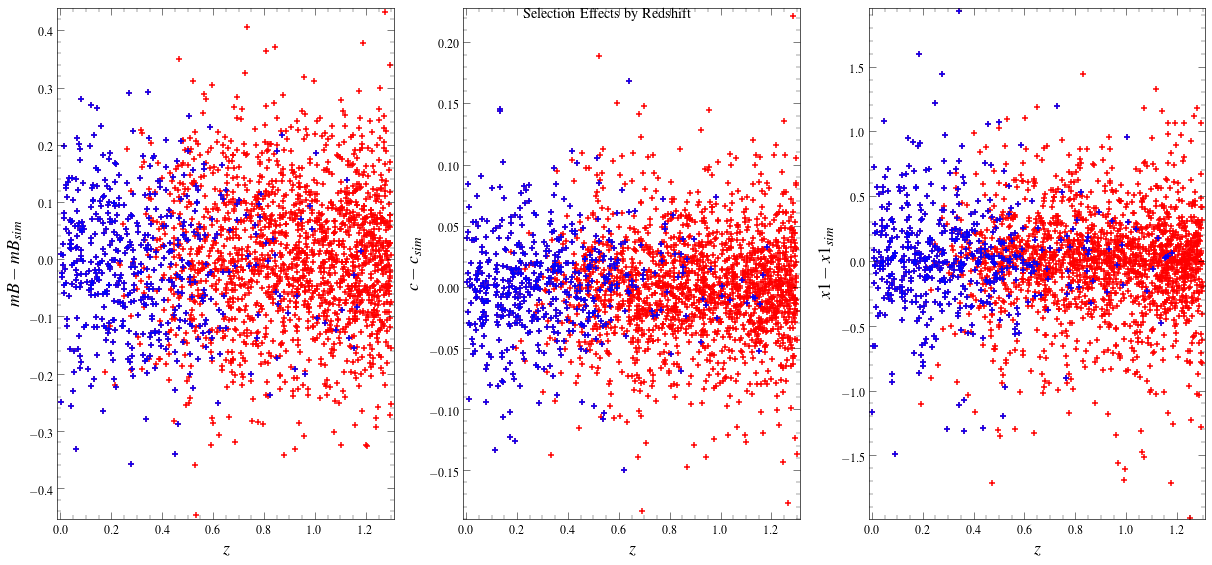

In [110]:
# plot msim - m by redshift
datafnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/sel_lcparams.txt'.format(job_id, i+1) for i in range(n_sims)]
latentfnames = ['/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/lc_params.txt'.format(job_id, i+1) for i in range(n_sims)]
    
datafname = datafnames[4]
latentname = latentfnames[4]

dats = [latentname, datafname]

labels = ['$mB-mB_{sim}$', '$c - c_{sim}$', '$x1 - x1_{sim}$']

#missed vs selected
colours = ['r', 'b']

D_chain = diagnostic[4]

columns = D_chain.columns
    
w_i = weight_arr[4]['norm'].values

mb_true = []
c_true = []
x1_true = []
z = []

m_means = []
c_means = []
x_means = []
    
m_means_reweighted = []
c_means_reweighted = []
x_means_reweighted = []

# make figure
fig = plt.figure(figsize=(17,8))

# selection fn in mB

        

for j in range(len(columns)):
    if j % 3 == 0:
        m_means.append(np.mean(D_chain[columns[j+2]]))
        c_means.append(np.mean(D_chain[columns[j]]))
        x_means.append(np.mean(D_chain[columns[j+1]]))
        
        m_means_reweighted.append(np.average(D_chain[columns[j+2]], weights=w_i))
        c_means_reweighted.append(np.average(D_chain[columns[j]], weights=w_i))
        x_means_reweighted.append(np.average(D_chain[columns[j+1]], weights=w_i))


    
for i in range(len(dats)):
    data = pd.read_csv(dats[i], sep='\s+', header=0)

    ndat = len(data)
    Zhel = data['z'].values
    zHD = data['z'].values
    # add second z column so that we have a zHD value
    data.insert(loc=1, column='zHD', value=zHD)
    Zcmb = data['z'].values
    
    z = (data['z'].values)

    # unpack data values
    mb_true = (data['true_mb'].values)
    c_true = (data['true_c'].values)
    x1_true = (data['true_x1'].values)
    
        # unpack measured vals
    c_meas = data['c'].values
    x1_meas = data['x1'].values
    mb_meas = data['mb'].values
    
    meas_par = [mb_meas, c_meas, x1_meas]
    true_par = [mb_true, c_true, x1_true]

    # compute true residual
    a_true = 0.13
    b_true = 2.56
    cosmo_param = [0.3, 0.7, 0.72]              # true simulated params
    mu = cosmology.muz(cosmo_param, Zcmb, Zhel) # distance modulus

    M_true = []

    for j in range(ndat):
        M_true.append(data['true_mb'].values[j] - mu[j] + a_true*data['true_x1'].values[j] - b_true*data['true_c'].values[j])
    
    
    for par in range(len(meas_par)):
        residual = np.array(meas_par[par]) - np.array(true_par[par])
        
        plt.subplot(1,3,par+1)

    #x = [j for l in M_true for j in l]
    #x = np.array(x)
    #z_plot = [i for k in z for i in k]

        plt.scatter(z, residual, marker='+', color=colours[i])
        plt.ylabel(labels[par], fontsize=18)
        plt.xlabel('$z$', fontsize=18)
        
plt.tight_layout()
fig.suptitle('Selection Effects by Redshift')
plt.show()

In [75]:
m_plot.shape

(5000,)

In [40]:
# plot contours of ellipses
for m_var in [m_means, m_means_reweighted]:
    x = M_true
    y = m_var
    cov = np.cov(x, y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    from matplotlib.patches import Ellipse
    ax = plt.subplot(111, aspect='equal')
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
    plt.scatter(x, y)
    plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [51]:
len(x)

10

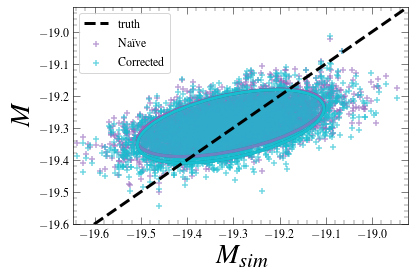

In [64]:
from matplotlib.patches import Ellipse
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

colors = ['#9467bd','#17becf']
labels = [r'Na\"ive', 'Corrected']

ax = plt.subplot(111)
varbs = [m_means, m_means_reweighted]
for i in range(len(varbs)):
    x = [j for l in M_true for j in l]
    y = varbs[i]

    nstd = 2


    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='k', linewidth=3)
    ell.set_facecolor(colors[i])
    ell.set_alpha(0.3)
    ax.add_artist(ell)
    
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color=colors[i], linewidth=3)
    ax.add_artist(ell)
    ell.set_facecolor('None')
    

    
    
    plt.scatter(x, y, marker='+', alpha=0.6, color = colors[i], label=labels[i])
    
#= plot truth line
    
x = np.linspace(start=min(m_means)-0.1, stop = max(m_means)+0.1, num=50)
y = np.linspace(start=min(m_means)-0.1, stop = max(m_means)+0.1, num=50)
ax.plot(x,y, linestyle='--', color='k', label='truth', linewidth=3)

ax.set_ylabel('$M$', fontsize=28)
ax.set_xlabel('$M_{sim}$', fontsize=28)
plt.legend()
plt.savefig('/rds/general/user/tmakinen/home/jobs/plots/{}_M_corrected.png'.format(job_id), rasterized=True, dpi='figure')

plt.show()

In [56]:
len(x)

10

In [58]:
D = pd.read_csv('/rds/general/user/tmakinen/home/jobs/gibbs_latent3/{}[{}].pbs/gibbs_chains/D_latent.csv'.format(job_id, 3), sep=",", header=None)

In [84]:
print(np.mean(c_true))

-0.011652073781778944


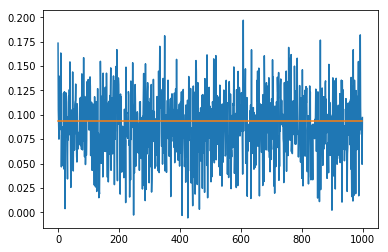

In [59]:
jla_dat = pd.read_csv('/rds/general/user/tmakinen/home/jobs/gibbs_latent3/{}[{}].pbs/data/lc_params.txt'.format(job_id, 3), sep="\s+", header=0)
point = jla_dat['true_c'][0]
plt.plot(np.arange(start=0, stop=len(D[0][::10])), D[0].values[::10])
plt.plot(np.arange(start=0, stop=len(D[0][::10])), np.ones(len(D[0][::10]))*point)
plt.show()

In [80]:
param_list = ['true_c', 'true_x1', 'M_true']
label_list = ['c', 'x1', 'M']
D = pd.read_csv('/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/gibbs_chains/D_latent.csv'.format(job_id, 3), sep=",", header=None)
jla_dat = pd.read_csv('/rds/general/user/tmakinen/home/jobs/long_gibbs/{}[{}].pbs/sel_lcparams.txt'.format(job_id, 3), sep="\s+", header=0)

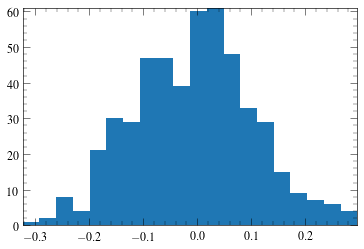

0.10955336471927059
-0.006938633598715301


In [83]:
plt.hist(jla_dat['c'], bins=20)
plt.show()
print(np.std(jla_dat['c']))
print(np.mean(jla_dat['c']))

In [156]:
# plot the true JLA data that we drew our latent values from
datafnames = ['/rds/general/user/tmakinen/home/jobs/gibbs_latent3/{}[{}].pbs/data/jla_lcparams.txt'.format(job_id, i+1) for i in range(n_sims)]
jla_dat = []
for i in range(n_sims):
    jla_dat.append(pd.read_csv(datafnames[i], sep='\s+', header=0))
jla_dat = pd.concat(jla_dat, axis=0)

true jla population color mean:  -0.023862447297297296
true jla population color spread:  0.08405487210573868


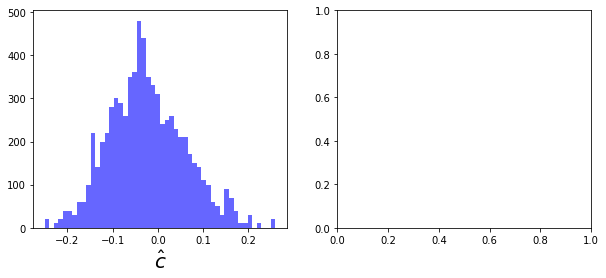

In [158]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(jla_dat['color'], color='b', alpha=0.6, bins=50)
#ax1.hist(jla_dat['true_c'], color='r', alpha=0.6, bins=50)
#ax1.title('True Simulated Color Distribution for 5000 SN1a', fontsize=20)
ax1.set_xlabel(r'$\hat{c}$', fontsize=20)


#ax2.hist(jla_dat['true_c'], color='r', alpha=0.6, bins=50)
#ax2.set_xlabel(r'true $c$', fontsize=20)
print('true jla population color mean: ', np.mean(jla_dat['color']))
print('true jla population color spread: ', np.std(jla_dat['color']))

In [130]:
# compute true residual
Zhel = jla_dat['z'].values
zHD = jla_dat['z'].values
    # add second z column so that we have a zHD value
jla_dat.insert(loc=1, column='zHD', value=zHD)
Zcmb = jla_dat['z'].values

# unpack data values
mb_true = jla_dat['true_mb'].values
c_true = jla_dat['true_c'].values
x1_true = jla_dat['true_x1'].values

# compute true residual
a_true = 0.13
b_true = 2.56
cosmo_param = [0.3, 0.7, 0.72]              # true simulated params
mu = cosmology.muz(cosmo_param, Zcmb, Zhel) # distance modulus
M_true = []


for i in range(ndat):
    M_true.append(mb_true[i] - mu[i] + a_true*x1_true[i] - b_true*c_true[i])

jla_dat.insert(loc=1, column='M_true', value=M_true)

In [137]:
import os

In [145]:
# repeat for 10 random SNIa
for k in range(10):
    randnum = int(np.random.rand()*500)
    # the random data
    for i in range(3):
        os.makedirs('{}_latent'.format(label_list[i]),exist_ok=True)
        j = randnum*3  # params stored in sets of 3
        point = jla_dat[param_list[i]][randnum]  # truth
        x = np.arange(start=0, stop=len(D[j+i][::10]))
        y = D[j+i].values[::10]

        nullfmt = plt.NullFormatter()         # no labels

        # definitions for the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left + width + 0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]

        # start with a rectangular Figure
        plt.figure(3, figsize=(9, 5))

        axScatter = plt.axes(rect_scatter)
        #axHistx = plt.axes(rect_histx)
        axHisty = plt.axes(rect_histy)

        # no labels
        #axHistx.xaxis.set_major_formatter(nullfmt)
        axHisty.yaxis.set_major_formatter(nullfmt)

        # the scatter plot:

        uplim = 28                         # set upper and lower limits for color bar (+3 std dev)
        lowlim = 17 

        sctrac = axScatter.plot(x, y, color=colors[i], alpha=0.6, label=label_list[i] + ' Posterior Chain')

        axScatter.plot(np.arange(start=0, stop=len(D[j+i][::10])), np.ones(len(D[j+i][::10]))*point, color='k', label='Simulated truth')

        # now determine nice limits by hand:
        binwidth = 0.5
        xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
        lim = (int(xymax/binwidth) + 1) * binwidth

    #axScatter.set_xlim((-lim, lim))
    #axScatter.set_ylim((-lim, lim))

    #axScatter.set_xlim((17, 25))
    #axScatter.set_ylim((-2, 3))

        bins = np.arange(-lim, lim + binwidth, binwidth)

        axHisty.hist(y, bins=60, color=colors[i], normed=False, orientation='horizontal', alpha=0.6)
    #axHisty.hist(y[hsc], bins=15, color='b', alpha=0.6, normed=False, orientation='horizontal')

    #axHistx.set_xlim(axScatter.get_xlim())
        axHisty.set_ylim(axScatter.get_ylim())

    #axHistx.set_ylabel('Count', fontsize=10)
    #axHisty.set_xlabel('Count', fontsize=10)

        axScatter.set_xlabel(r'$t /10$', fontsize = 17)
        axScatter.set_ylabel('${}$'.format(label_list[i]),fontsize=17)
        axScatter.legend(loc='best')
        plt.savefig('/rds/general/user/tmakinen/home/jobs/gibbs_latent3/{}_latent/snia_{}'.format(label_list[i], randnum), dpi='figure')
        plt.close()

In [14]:
# get performance stats
stat_fnames = ['/rds/general/user/tmakinen/home/jobs/gibbs_latent3/{}[{}].pbs/gibbs_chains/sampler_stats.csv'.format(job_id, i+1) for i in range(n_sims)]

In [15]:
colnm = [r'$\mathscr{C}$ acceptance fraction', r'$\mathscr{B}$ acceptance fraction', 'runtime (hrs)']

In [16]:
stat_tab = []
for name in stat_fnames:
    stt = pd.read_csv(name, sep=',', header=None)
    stt.columns = colnm
    stat_tab.append(stt)
stat_tab = pd.concat(stat_tab, axis=0)
#stat_tab.rename(index=)

In [17]:
stat_tab.index = [i+1 for i in range(10)]

In [19]:
stat_tab['runtime (hrs)'] = stat_tab['runtime (hrs)'] / 60 / 60

# $\mathscr{C}\ = \{ \Omega_m, \Omega_{de} \} \sim \mathscr{MH}(\mathscr{C} | \mathscr{\hat{D}}, \Sigma_D', \mathscr{B}')$
# $\mathscr{B}\ = \{ \alpha, \beta \} \sim \mathscr{MH}(\mathscr{C} | \mathscr{\hat{D}}, \Sigma_D', \mathscr{B})$

In [20]:
stat_tab

,$\mathscr{C}$ acceptance fraction,$\mathscr{B}$ acceptance fraction,runtime (hrs)
1,0.2619,0.1173,8.973991
2,0.2151,0.3590,17.023914
3,0.2898,0.1684,17.043342
4,0.2234,0.1760,14.866390
5,0.3055,0.1321,8.963554
6,0.3323,0.0366,10.441058
7,0.2428,0.1272,8.998381
8,0.2918,0.4403,10.526921
9,0.3637,0.1636,10.552602
10,0.3350,0.2396,10.457072


##                 Importance Sampling
# $\textbf{E}[f] = \int{}{}f(\vec{\textbf{x}})\ {p}(\vec{\textbf{x}}) d\vec{x} = \int{}{}f(\vec{\textbf{x}}) \frac{\tilde{p}(\vec{\textbf{x}})}{\tilde{q}(\vec{\textbf{x}})} \tilde{q}(\vec{\textbf{x}})$
## For Discrete Case over s=1,...,S posterior points: 
# $ \approx \frac{1}{S} \sum_{s=1}^{S} w_s f(\vec{x}^s)$

# where $ w_s := \frac{p(\vec{x^s})}{q(\vec{x^s})} = \frac{\mathscr{L_{{corr}}}}{\mathscr{L}_{vanilla}} $

# normalized weights $ w_s := \frac{\tilde{p}(\vec{x^s})\ /\ \tilde{q}(\vec{x^s})}{\sum_{m=1}^{M}\tilde{p}(\vec{x^m})\ /\ \tilde{q}(\vec{x^m})} $

# where 
# $ {p}(\vec{x^s}) = \frac{1}{N_p} \tilde{p}(\vec{x^s})   $
# $ {q}(\vec{x^s}) = \frac{1}{N_q} \tilde{q}(\vec{x^s}) $

# $ \sigma_{err} = \frac{\langle bias \rangle}{\sqrt{\sigma_{bias}^2 + \sigma_{means}^2}}$